In [1]:
import numpy as np
from tensorprob import Model, Parameter, Normal

In [2]:
with Model() as model:
    mu = Parameter()
    sigma = Parameter(lower=0)

    X = Normal(mu, sigma)

model.observed(X)
model.initialize({
    mu: 0,
    sigma: 1,
})

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

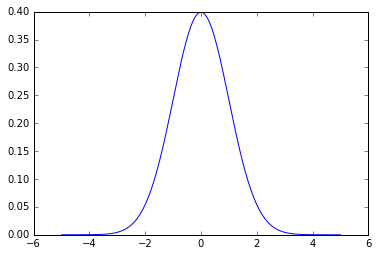

In [4]:
xs = np.linspace(-5, 5, 200)
plt.plot(xs, model.pdf(xs), 'b-')

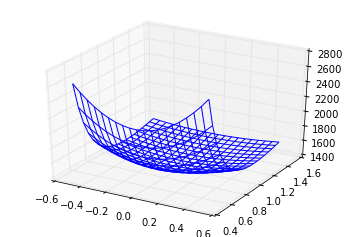

In [5]:
data = np.random.normal(0, 1, 1000)
@np.vectorize
def nll(mu_, sigma_):
    model.assign({mu: mu_, sigma: sigma_})
    return model.nll(data)

ax = plt.gcf().add_subplot(111, projection='3d')
mu_, sigma_ = np.meshgrid(np.linspace(-.5, .5, 20), np.linspace(.5, 1.5, 20))
ax.plot_wireframe(mu_, sigma_, nll(mu_, sigma_))